In [1]:
import sys
sys.path.append("../../../repository")
import numpy as np

In [2]:
from src.pulsed_power_ml.models.gupta_model.gupta_clf import GuptaClassifier
from src.pulsed_power_ml.models.gupta_model.gupta_utils import read_power_data_base
from src.pulsed_power_ml.models.gupta_model.gupta_utils import read_parameters

from src.pulsed_power_ml.model_framework.data_io import read_training_files

from src.pulsed_power_ml.model_framework.visualizations import plot_data_point_array

In [3]:
power_db_file = "/home/thomas/projects/nilm_at_fair/repository/src/pulsed_power_ml/models/gupta_model/apparent_power_data_base.yml"
parameter_file = "/home/thomas/projects/nilm_at_fair/repository/src/pulsed_power_ml/models/gupta_model/parameters.yml"
data_folder = "/home/thomas/projects/nilm_at_fair/training_data/2022-10-25_training_data/led/"
training_data_folder = "/home/thomas/projects/nilm_at_fair/training_data/2022-10-25_training_data/labeled_training_data/"

In [4]:
apparent_power_list = read_power_data_base(power_db_file)
parameter_dict = read_parameters(parameter_file)

In [5]:
clf = GuptaClassifier(
    background_n=parameter_dict["background_n"],
    fft_size_real=parameter_dict["fft_size"] / 2,
    sample_rate=parameter_dict["sample_rate"],
    n_known_appliances=3, # just for this test
    spectrum_type=2,
    n_peaks_max=10,
    apparent_power_list=apparent_power_list,
    n_neighbors=3,
)

In [6]:
# Load training data
X = np.genfromtxt(training_data_folder + "Features_ApparentPower.csv",
                  delimiter=",")
y = np.genfromtxt(training_data_folder + "Labels_ApparentPower.csv",
                  delimiter=",")
print(f"Shape X = {X.shape}")
print(f"Shape y = {y.shape}")

Shape X = (4, 30)
Shape y = (4, 7)


In [7]:
clf.fit(X, y)

GuptaClassifier(apparent_power_list=[('fluorescent_0', 50.0),
                                     ('halogen_0', 45.9), ('led_0', 5.8)],
                n_known_appliances=3, n_neighbors=2, spectrum_type=2)

In [8]:
data_array = read_training_files(data_folder,
                                 fft_size=parameter_dict["fft_size"])

In [9]:
state_vector_list = list()
for data_point in data_array:
    state_vector = clf.predict(data_point)
    state_vector_list.append(state_vector)

Event detected: Calculate feature vector


/home/thomas/.venv/nilm_at_fair/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


2


In [10]:
data_point.shape

(196612,)

In [11]:
state_vector_list

[array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.86867487e-06]),
 array([0.        , 0.        , 0.        , 0.01357972]),
 array([0.        , 0.        , 0.        , 0.04041153]),
 array([0.        , 0.        , 0.        , 0.06846129]),
 array([0.        , 0.        , 0.        , 0.09167124]),
 array([0.        , 0.        , 0.        , 0.11532909]),
 array([0.       , 0.       , 0.       , 0.1365889]),
 array([0.        , 0.        , 0.        , 0.15678276]),
 array([0.        , 0.        , 0.        , 0.17690653]),
 array([0.        , 0.        , 0.        , 0.19409344]),
 array([0.        , 0.        , 0.        , 0.21234584]),
 array([0.        , 0.        , 0.        , 0.22587669]),
 array([0.       , 0.       , 0.       , 0.2410633]),
 array([0.        , 0.        , 0.        , 0.25351593]),
 array([0.        , 0.        , 0.        , 0.26666766]),
 array([0.        , 0.        , 0.        , 0.27891636]),
 array([0.        , 0.        , 0.        , 0.28956187]),
 array

In [12]:
len(state_vector_list)

492

In [13]:
fig = plot_data_point_array(data_array,
                            parameter_dict["fft_size"],
                            state_vector_list)
fig.savefig("led_classification.png", dpi=400)

/home/thomas/projects/nilm_at_fair/repository/src/pulsed_power_ml/model_framework/visualizations.py:129: RuntimeWarning: invalid value encountered in log10
  ax.imshow(X=np.log10(spectrum.T),


In [14]:
data_array.shape

(492, 196612)

In [15]:
len(state_vector_list)

492

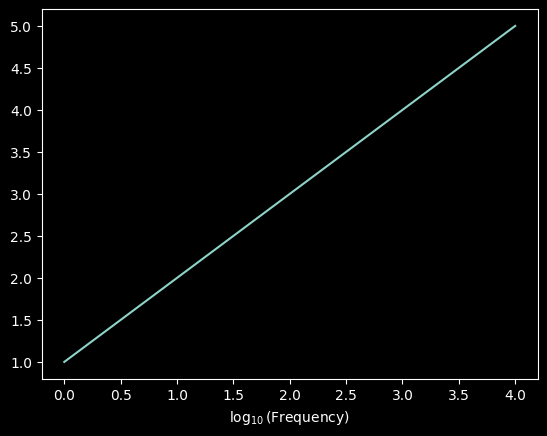

In [16]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")


fig = plt.figure()
ax = fig.add_subplot()
ax.plot([1,2,3,4,5])
ax.set_xlabel(r"$\log_{10}$(Frequency)")
fig.savefig("style_test.png", dpi=500)
